In [1]:
import dlispy as dls 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipe

# Taking Data from DLIS Log File

In [5]:
dls.dump('MUD_LOG_2.DLIS', output_path='csv')

False
False
dump


In [6]:
df = pd.read_csv('csv/00001_TEMP/1_0_1_000000B0.csv')

In [7]:
df.head()

,frameNumber,"TDEP, m","DVER, m","BDIA, in","ROPA, m/h","HKLA, t","HKLX, t","WOBA, t","TQA, kJ","TQX, kJ",...,"EPNA, ppm","C1C2,","C1C3,","C1C4,","C1C5,","LITH,","WLFL,","WLCL,","CCAL,","CDOL,"
0,1,223.0,223.0,26.0,1.500000,96.389999,100.839996,0.19,3.22,7.37,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
1,2,224.0,224.0,26.0,3.840000,97.110001,104.370003,0.60,3.19,11.72,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
2,3,225.0,225.0,26.0,3.510000,96.760002,103.190002,0.58,3.90,13.62,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
3,4,226.0,226.0,26.0,21.850000,97.110001,104.760002,0.36,0.01,0.01,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
4,5,227.0,227.0,26.0,33.790001,94.760002,96.519997,2.55,0.01,0.01,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25


# Data Cleaning and Exploratory analytics

<AxesSubplot:>

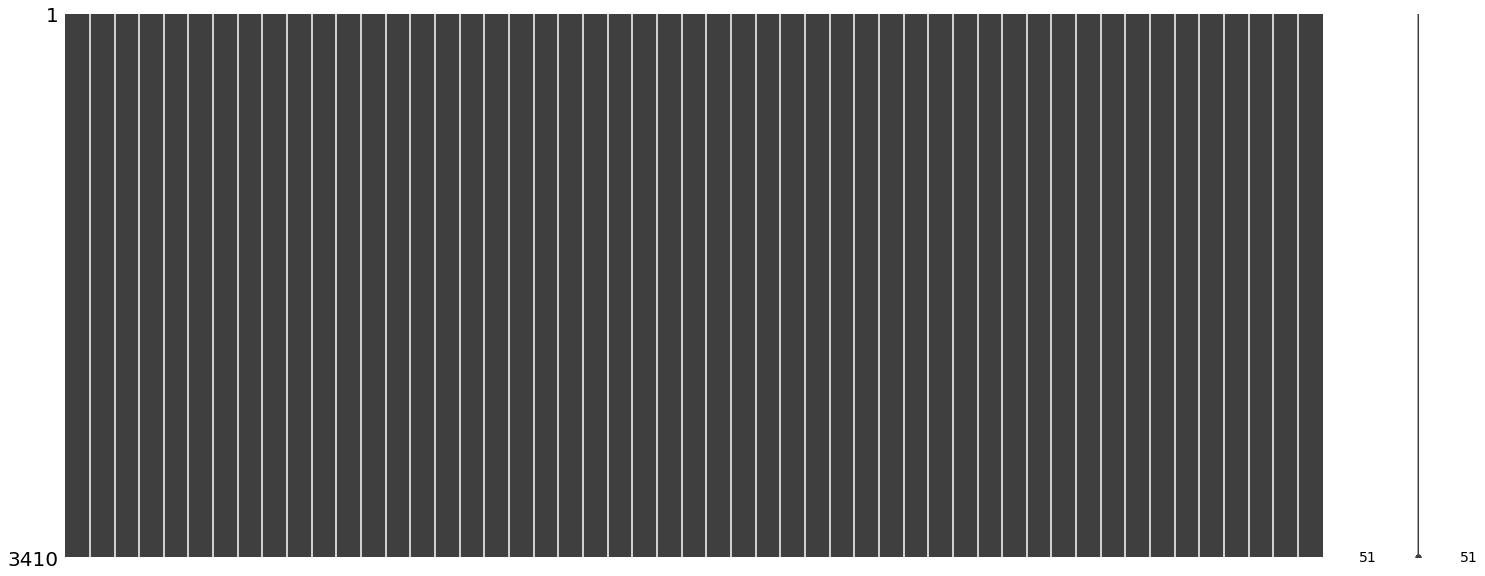

In [8]:
msno.matrix(df) #Checking for missing data. Here there are no NULL values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   frameNumber  3410 non-null   int64  
 1   TDEP, m      3410 non-null   float64
 2   DVER, m      3410 non-null   float64
 3   BDIA, in     3410 non-null   float64
 4   ROPA, m/h    3410 non-null   float64
 5   HKLA, t      3410 non-null   float64
 6   HKLX, t      3410 non-null   float64
 7   WOBA, t      3410 non-null   float64
 8   TQA, kJ      3410 non-null   float64
 9   TQX, kJ      3410 non-null   float64
 10  RPMA, c/min  3410 non-null   float64
 11  RPMB, c/min  3410 non-null   float64
 12  SPPA, bar    3410 non-null   float64
 13  TVA, m3      3410 non-null   float64
 14  MFOA, L/min  3410 non-null   float64
 15  MFIA, L/min  3410 non-null   float64
 16  MDOA, sg     3410 non-null   float64
 17  MDIA, sg     3410 non-null   float64
 18  MTOA, degC   3410 non-null   float64
 19  MTIA, 

In [10]:
df.describe().iloc[:,-12:]

,"IPNA, ppm","NPNA, ppm","EPNA, ppm","C1C2,","C1C3,","C1C4,","C1C5,","LITH,","WLFL,","WLCL,","CCAL,","CDOL,"
count,3410.000000,3410.000000,3410.00,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.00,3410.00,3410.00,3410.00
mean,-331.578003,-331.544211,-999.25,122.008805,-46.787819,-335.674006,-357.434950,-188.073167,-999.25,-999.25,-999.25,-999.25
std,470.732012,470.756005,0.00,1235.815859,940.594012,513.468977,502.663344,591.018771,0.00,0.00,0.00,0.00
min,-999.250000,-999.250000,-999.25,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.25,-999.25,-999.25,-999.25
25%,-999.250000,-999.250000,-999.25,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.25,-999.25,-999.25,-999.25
50%,0.000000,0.000000,-999.25,27.680000,56.270000,0.000000,0.000000,90.000000,-999.25,-999.25,-999.25,-999.25
75%,0.000000,0.000000,-999.25,82.362501,156.689995,53.649999,0.000000,220.000000,-999.25,-999.25,-999.25,-999.25
max,9.950000,10.520000,-999.25,10115.519531,10605.360352,359.570007,1664.119995,570.000000,-999.25,-999.25,-999.25,-999.25


In [11]:
df.columns

Index(['frameNumber', 'TDEP, m', 'DVER, m', 'BDIA, in', 'ROPA, m/h', 'HKLA, t',
       'HKLX, t', 'WOBA, t', 'TQA, kJ', 'TQX, kJ', 'RPMA, c/min',
       'RPMB, c/min', 'SPPA, bar', 'TVA, m3', 'MFOA, L/min', 'MFIA, L/min',
       'MDOA, sg', 'MDIA, sg', 'MTOA, degC', 'MTIA, degC', 'MROA, ohm.m',
       'MRIA, ohm.m', 'ECDT, sg', 'BDTI, h', 'BDDI, m', 'BRTI, h', 'BRVC, ',
       'TCTI, h', 'FPPG, sg', 'DXC, ', 'GASA, ', 'GASX, ', 'HSA, ', 'HSX, ',
       'MTHA, ppm', 'ETHA, ppm', 'PRPA, ppm', 'IBTA, ppm', 'NBTA, ppm',
       'IPNA, ppm', 'NPNA, ppm', 'EPNA, ppm', 'C1C2, ', 'C1C3, ', 'C1C4, ',
       'C1C5, ', 'LITH, ', 'WLFL, ', 'WLCL, ', 'CCAL, ', 'CDOL, '],
      dtype='object')

In [12]:
#Removing erroneous columns 

del_col = ['C1C2, ', 'C1C3, ', 'C1C4, ','C1C5, ','NBTA, ppm','IPNA, ppm', 'NPNA, ppm', 'EPNA, ppm','HSA, ', 'HSX, ','MRIA, ohm.m','MTOA, degC','MTIA, degC', 'MROA, ohm.m','frameNumber', 'TDEP, m', 'DVER, m','WLFL, ', 'WLCL, ', 'CCAL, ', 'CDOL, ','EPNA, ppm']
df.drop(del_col, axis=1, inplace = True)

In [13]:
#Removing rows with negative(missing) data

for j in df.columns:
      for i in df.index:
        if(df.loc[i, j]<0):
            df.drop(i, axis=0, inplace=True)


In [14]:
for i in df.index:
    if(df.loc[i,'LITH, '] == 570.0):
     df.drop(i, axis=0, inplace=True)

In [15]:
d = {90: 'claystone', 220:'sandstone',530:'limestone',500:'chalk'}
lith_list = ['claystone','sandstone','chalk','limestone']

[Text(0, 0, 'claystone'),
 Text(1, 0, 'sandstone'),
 Text(2, 0, 'chalk'),
 Text(3, 0, 'limestone')]

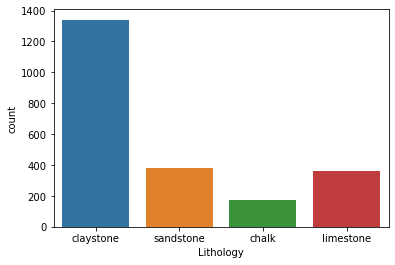

In [16]:
plot = sns.countplot(x='LITH, ', data=df)
plot.set_xlabel('Lithology')
plot.set_xticklabels(lith_list)

# Deleting highly correlated features

<AxesSubplot:>

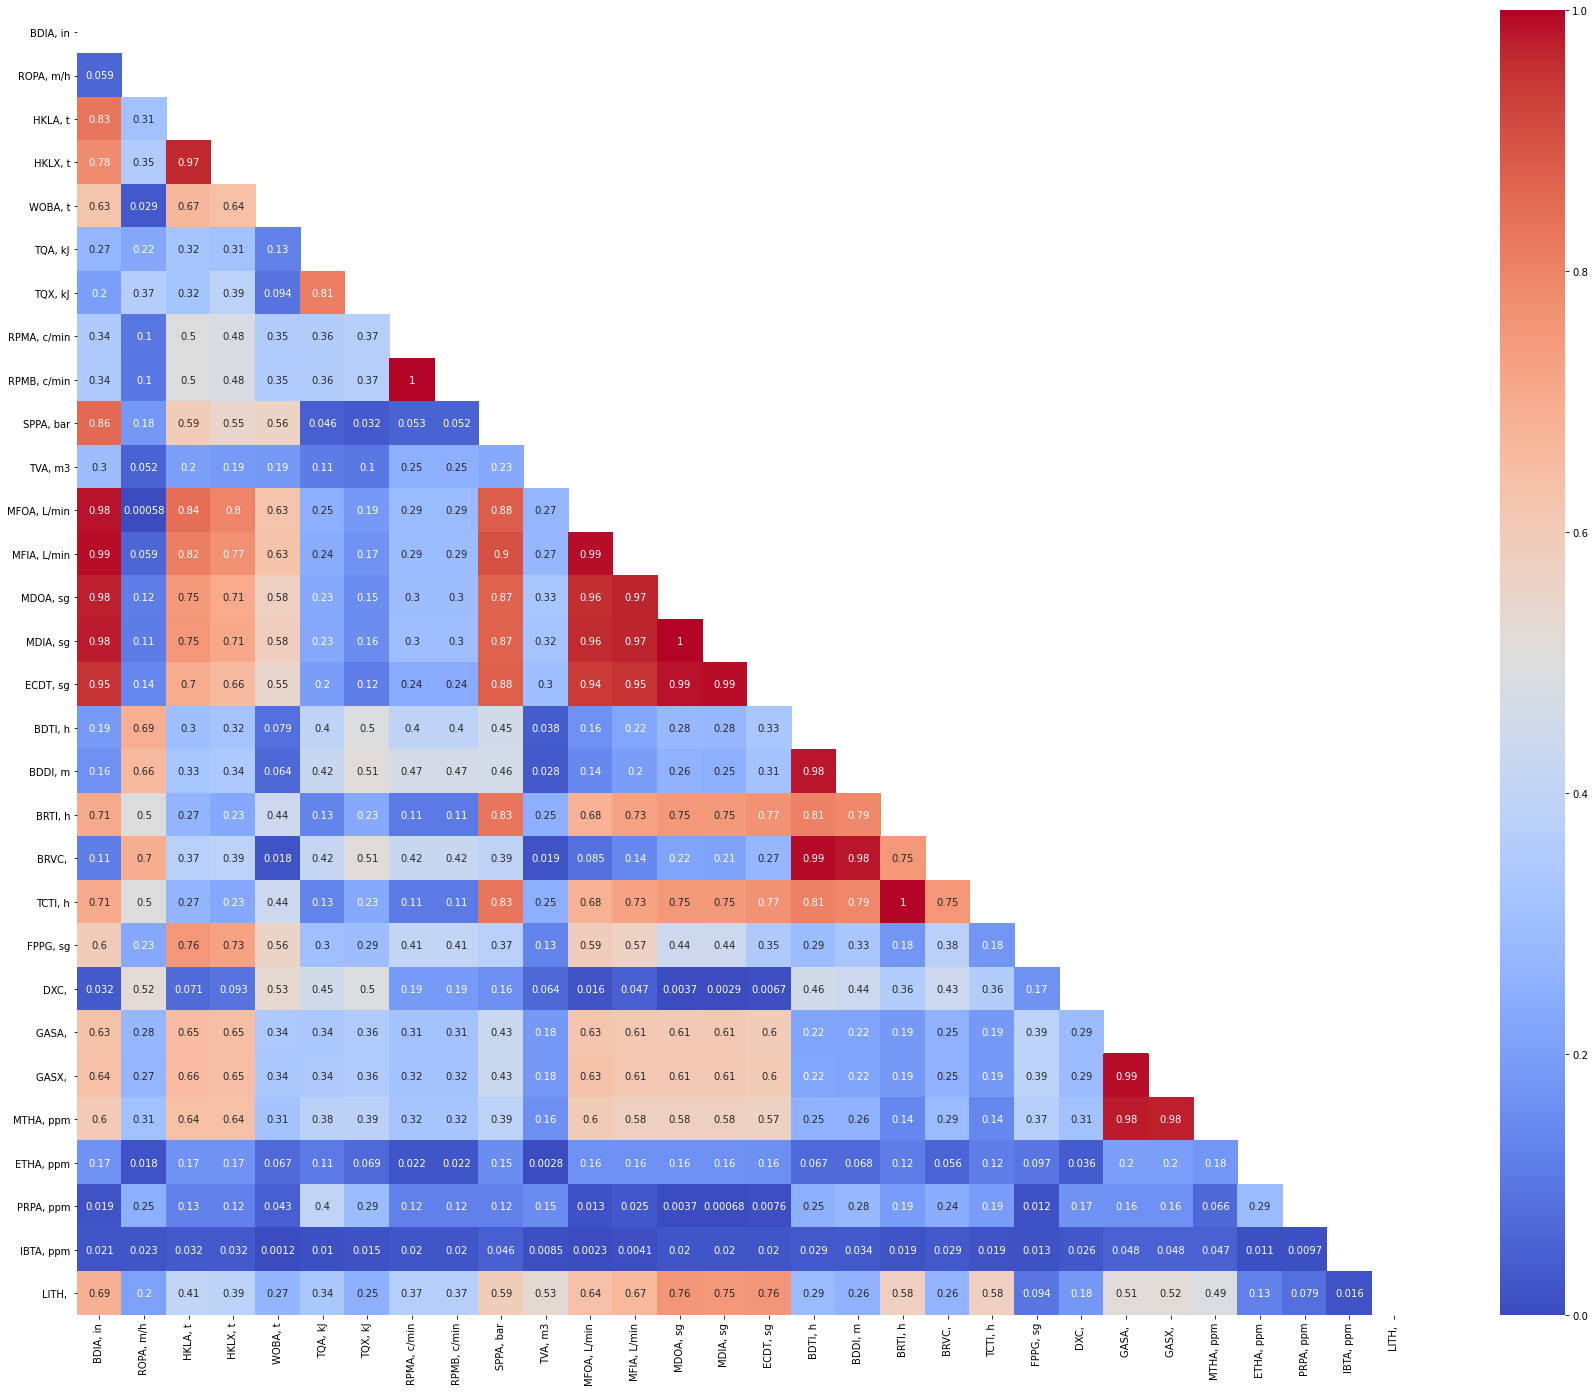

In [17]:
#Generating the correlation matrix and correlation heatmap

plt.rcParams['figure.figsize']  = [30,24]

corr_matrix = df.corr().abs()

for i in range(np.size(corr_matrix.index)):
    for j in range(np.size(corr_matrix.index)):
        if(j>=i):
            corr_matrix.iloc[i,j] = None

sns.heatmap(corr_matrix, cmap = "coolwarm", vmin=0, vmax=1, annot=True)

In [18]:
#Choosing which columns to delete (columns with correlation higher than 80% are selected)

del_col2 = [col for col in corr_matrix.columns if any(corr_matrix[col]>0.8)]
del_col2

['BDIA, in',
 'HKLA, t',
 'TQA, kJ',
 'RPMA, c/min',
 'SPPA, bar',
 'MFOA, L/min',
 'MFIA, L/min',
 'MDOA, sg',
 'MDIA, sg',
 'BDTI, h',
 'BDDI, m',
 'BRTI, h',
 'GASA, ',
 'GASX, ']

In [19]:
#Deleting the chosen columns 

df.drop(labels=del_col2, axis=1, inplace=True)

In [20]:
df.head()

,"ROPA, m/h","HKLX, t","WOBA, t","TQX, kJ","RPMB, c/min","TVA, m3","ECDT, sg","BRVC,","TCTI, h","FPPG, sg","DXC,","MTHA, ppm","ETHA, ppm","PRPA, ppm","IBTA, ppm","LITH,"
1133,25.430000,116.919998,3.70,13.640000,60.529999,44.639999,1.4,185.789993,16.870001,0.02,0.54,100.989998,30.139999,0.0,0.0,90.0
1134,25.110001,116.919998,3.60,13.060000,60.000000,44.540001,1.4,315.940002,16.910000,0.02,0.53,97.269997,30.139999,0.0,0.0,90.0
1135,16.459999,114.559998,9.73,15.780000,60.160000,41.689999,1.4,1060.050049,19.549999,0.01,0.74,856.530029,178.179993,0.0,0.0,90.0
1136,5.340000,116.529999,9.92,18.940001,60.049999,41.459999,1.4,1900.780029,19.820000,0.01,0.94,2428.189941,237.860001,0.0,0.0,90.0
1137,16.990000,114.959999,9.17,12.090000,59.840000,40.759998,1.4,2102.669922,19.889999,0.01,0.72,2749.139893,237.860001,0.0,0.0,90.0


# Running the Model

In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1].ravel()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [23]:
pipe = imbpipe([('scaler',MinMaxScaler()) ,('smote',SMOTE()),('knn', KNeighborsClassifier())])

In [24]:
    param_grid = { 'knn__n_neighbors':np.arange(1,20)}
    gs = GridSearchCV(pipe, param_grid )
    gs.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('smote', SMOTE()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

0.9373775985756925

In [33]:
 pipe = gs.best_estimator_
 print('Best score: {}'.format(gs.best_score_))
 print('Best Model: {}'.format(gs.best_estimator_))

Best score: 0.9373775985756925
Best Model: Pipeline(steps=[('scaler', MinMaxScaler()), ('smote', SMOTE()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])


In [27]:
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        90.0       0.97      0.93      0.95       318
       220.0       0.82      0.93      0.87        97
       500.0       0.85      1.00      0.92        40
       530.0       0.95      0.90      0.93       110

    accuracy                           0.93       565
   macro avg       0.90      0.94      0.92       565
weighted avg       0.93      0.93      0.93       565



In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
y_test_ = pd.DataFrame(y_test)
y_pred_ = pipe.predict_proba(x_test)

In [32]:
roc_auc_score(y_test_, y_pred_, average='weighted', multi_class='ovr')

0.9781384394728596